In [1]:

%matplotlib notebook
import sympy as sym
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode
import emcee
from matplotlib          import rc 
from matplotlib          import cm
from scipy.stats import norm
from scipy.stats import cauchy

import pandas as pd
import corner


# Técnicas De Conteo

20

Demostración por inducción:

Dada la fórmula de combinatoria con repetición para $n$ elementos:

$$
C_{r}^{n}=\binom{n+r-1}{r}=\frac {(n+r-1)!}{r!(n-1)!}
$$

1) Caso Base:

Para n=1 y r=0 se tiene:

$$
C_{0}^{1}=\binom{1+0-1}{0}=\frac{(1+0-1)!}{0!(1-1)!}
=\frac{0!}{0!0!}=\frac{1}{1}=1
$$


2) Paso Inductivo:

Para verificar $C_{r}^{n+1}$ necesitamos comprobar que:

$$
C_{r}^{n+1}=\binom{n+1+r-1}{r}=\binom{n+r}{r}=\frac{(n+r)!}{r!n!}
$$

De modo que se tiene:

$$
\begin{equation} \label{eq1}
\begin{split}
C_{r}^{n+1}&=\binom{n+1+r-1}{r}\\
&= \binom{n+r-1}{r-1} + \binom{n+r-1}{r}\\
&= \frac {(n+r-1)!}{(r-1)!(n+r-1-r+1)!} + \frac{(n+r-1)!}{r!(n+r-1-r)!}\\
&=\frac{r(n+r-1)!}{r!n!} + \frac{(n+r-1)!}{r!(n-1)!}\\
&=\frac{r(n+r-1)!}{r!n!}+\frac{n(n+r-1)!}{r!n!}\\
&=\frac{r(n+r-1)! + n(n+r-1)!}{r!n!}\\
&=\frac{(n+r-1)!(r+n)}{r!n!}\\
&=\frac{(n+r)!}{r!n!}\\
\end{split}
\end{equation}
$$ 

Entonces $C_{r}^{n+1}$ es verdadera siempre que $C_{r}^{n}$. De forma que por el principio de inducción, $C_{r}^{n}=\binom{n+r-1}{r}=\frac {(n+r-1)!}{r!(n-1)!}$ es verdadera.

22 

Teórico:

Teniendo en cuenta que se busca realizar la suma de 3 enteros que de 10, entonces se pueden sumar numeros que esten en el rango [0,10] Se realiza una combinación con repetición, dada por la siguiente fórmula:

$$
C_{r}^{n} = \binom{n+r-1}{r}
$$

Siendo $r$ la cantidad de particiones entre los números que podemos elegir (al tener 3 enteros, hay 2 particiones entre ellos) y $n$ la cantidad de números de los que se pueden elegir (en este caso 11). De modo que se tiene:

$$
C_{2}^{11} = \binom{11+2-1}{2} = \binom{12}{2}\\
= \frac{12!}{2! (11-1)!}= \frac{479001600}{2(3628800)}=\frac{479001600}{7257600}=66
$$


Computacional:

In [2]:
num=np.array([0,1,2,3,4,5,6,7,8,9,10])
count=0

for i in range(len(num)):
    for j in range(len(num)):
        for k in range(len(num)):
            suma=i+j+k
            if suma==10:
                count+=1
                
count

66

23

Teniendo 9 llaves (3 rojas, 3 verdes y 3 azules), para sacar 4 al azar tenemos las siguientes posibles configuraciones:

$$
\begin{equation}
\begin{matrix}
1- RRRV \\     
2- RRRA\\
3- VVVA\\
4- VVVR\\
5- AAAR\\
6- AAAV
\end{matrix}
\begin {matrix}
|\\
|\\
|\\
|\\
|\\
|
\end {matrix}
\begin{matrix}
 7- RRVV \\     
 8- RRAA\\
 9- RRAV\\
 10- VVAA\\
 11- VVAR\\
 12- AARV
\end{matrix}
\end{equation}
$$

Sabiendo esto, podemos identificar que hay tres  formas de elegirlas 4 llaves dadas por las siguientes operaciones:

1. Tres del mismo color y una de alguno de los dos coleres restantes:

$$
3*2=6
$$
Donde el $3$ implica la cantidad de opciones de las que se pueden elegir el color de las tres llaves y el $2$ la cantidad de opciones para elegir la del color distinto. 

2. Dos del mismo color con dos de otro color:

$$
\frac{3*2}{2}=3
$$
Donde el $3$ implica la cantidad de opciones de las que se puede elegir el color de las primeras dos llaves del mismo color y el $2$ por el que se multiplica se refiere a la cantidad de opciones para elegir el color de las otraas dos llaves. Esto se divide entre $2$ ya que tener, por ejemplo: $RRAA$ es lo mismo que tener $AARR$.

3. Dos del mismo color y las otras dos de colores distintos:

$$
3*1*1=3
$$
Donde el $3$ implica la cantidad de opciones de las que se puede elegir el color de las primeras dos llaves del mismo color y cada $1$ es la cantidad de posibilidades para elegir los otros dos colores, de modo que solo hay una posibilidad ya que si o si van a estar presentes ambos colores.



## Generales de Probabilidad

4

In [3]:
d=365
x=np.arange(1,81)
probgraficar=np.zeros(80)
probgeneral=np.zeros(365)

datos= []

for i in range(len(probgeneral)):
    f_i= (d-i)/d
    datos.append(f_i)
    if i<=80:
        probgraficar[i-1]=np.prod(datos)
        probgeneral[i-1]=np.prod(datos)
    else:
        probgeneral[i-1]=np.prod(datos)



<IPython.core.display.Javascript object>


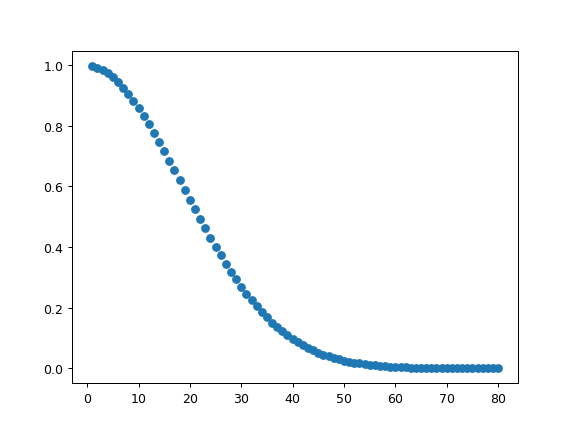

In [4]:
plt.scatter(x,probgraficar)

9

Para $P_{1}\neq \frac{1}{2}$ se deben tener en cuenta los siguientes casos:

1. Obtener las dos caras en las monedas no truncadas:

Se multiplica la probabilidad de tener las dos caras en las no truncadas por la de tener sello en la truncada
$$
P_{ntrun}= \frac{3}{8}(1-P_{1})
$$

2. Obtener una cara en la moneda trucada:

Se multiplica la probabilidad de tener una cara en las no truncadas por la de tener cara en la truncada

$$
P_{trun}= \frac{3}{8}(P_{1})
$$

Para obtener la probabilidad total de tener 2 caras en los lanzamientos, se suman estos dos eventos:

$$
\begin{equation}
\begin{split}
P_{T}&=P_{trun}+P_{ntrun}\\
&=\frac{3}{8}(P_{1}) + \frac{3}{8}(1-P_{1})\\
&=\frac{3}{8}(P_{1})+ \frac{3}{8} -\frac{3}{8}(P_{1})\\
&=\frac{3}{8}
\end{split}
\end{equation}
$$

Para $P_{1}$ y $P_{2} \neq \frac{1}{2}$ se deben tener en cuenta los siguientes casos:

$$
1. C,C,S,S\\
2. S,S,C,C\\
3. C,S,C,S\\
4. S,C,S,C\\
$$
Aunque para los casos 3 y 4 en las monedas 2 y 3 no importa el orden sino que una de ellas sea cara, ya que ambas opciones para estas dos monedas tienen la misma probabilidad ($\frac{1}{2}$).


In [5]:
P_1=sym.Symbol('p_1', real=True)
P_2=sym.Symbol('p_2', real=True)
def Probabilidad(P_1,P_2):
    caso1= P_1*P_2*(1/2)*(1/2)
    caso2= (1-P_1)*(1-P_2)*(1/2)*(1/2)
    caso3= P_1*(1-P_2)*(1/2)
    caso4= (1-P_1)*P_2*(1/2)
    total=caso1+caso2+caso3+caso4
    
    return total

func=sym.simplify(Probabilidad(P_1,P_2))
func

-0.5*p_1*p_2 + 0.25*p_1 + 0.25*p_2 + 0.25

<IPython.core.display.Javascript object>


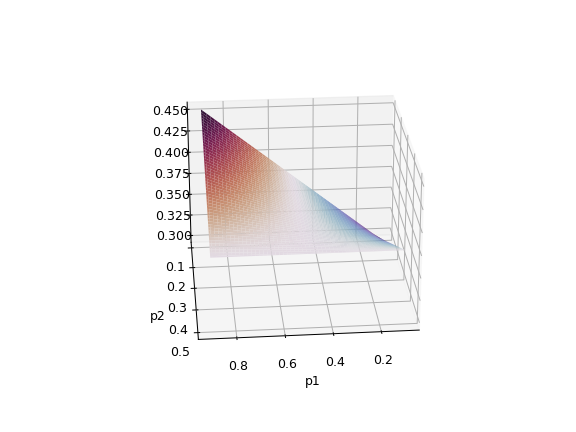

In [6]:
p_1=np.linspace(0.1,0.9,100)
p_2=np.linspace(0.1,0.5,100)
z=np.zeros([100,100])
p1,p2=np.meshgrid(p_1,p_2)
z=Probabilidad(p1,p2)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(p1,p2,z,cmap='twilight_shifted')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.view_init(elev=25, azim=85)

In [7]:
maxi=0
mini=2
maximo=np.array([0,0])
minimo=np.array([0,0])
maxis=[]
minis=[]

for i in range(len(p_1)):
    for j in range(len(p_2)):
        
        z_i=Probabilidad(p_1[i],p_2[j])
        if z_i>maxi:
            maxi=z_i
            maxis.append([p_1[i],p_2[j]])
            
        if z_i<mini:
            mini=z_i
            minis.append([p_1[i],p_2[j]])
            
maxis[-1],minis[-1],maxi,mini

print('El punto de probabilidad máxima es: ',maxis[-1],'con un valor de: ',maxi,' y el punto de probabilidad mínima es: ', minis[-1],' con un valor de: ', mini)

El punto de probabilidad máxima es:  [0.9, 0.1] con un valor de:  0.455  y el punto de probabilidad mínima es:  [0.1, 0.1]  con un valor de:  0.295


12

a) 

Dedo que se tienen N partículas y que cada una puede adoptar un nivel de energía $\epsilon_{0}$ o $\epsilon_{1}$ de moso que la cantidad de partículas que se encuentren el estado $\epsilon_{0}$ esté dado por $n_{0}$ y las que se encuentren en el estado $\epsilon_{1}$ estén dadas por $n_{1}$. El número de configuraciones posibles estará dado por una combinación sin repetición de forma que podemos partir de la siguiene fórmula:

$$
C_{r}^{n}= \frac{n!}{(n-r)!r!}
$$

Usando $n=N$ y $r=n_{0}$, obteniendo: 

$$
C_{n_{0}}^{N}= \frac{N!}{(N-n_{0})!n_{0}!}
$$

y sabiendo que $N=n_{0} + n_{1}$ tenemos que el número de configuraciones posibles está dado por:

$$
\Omega(N,n_{0})= \frac{N!}{(n_{1})!n_{0}!}
$$



b)

A partir de la ecuación de la entropía dada por: $S(N,n_{0})=k_{B}ln(\Omega)$ y la fórmula de Stirling $ln(N!)\cong Nln(N)-N $ tenemos que:

$$\begin{equation}
\begin{split}
S(N,n_{0})&=k_{B}ln \Big(\frac{N!}{n_{0}!n_{1}!} \Big)\\
&=k_{B}\Big( ln(N!) - ln(n_{0}!) - ln(n_{1}) \Big) \\
&=k_{B} \Big( Nln(N) - N - n_{0}ln(n_{0}) + n_{0} - n_{1}ln(n_{1}) + n_{1} \Big)\\
&=k_{B} \Big( Nln(N)-N+N-n_{0}ln(n_{0})-n_{1}ln(n_{1}) \Big)\\
&=k_{B} \Big( Nln(N)- \sum_{i=0}^1 n_{i}ln(n_{i}) \Big)
\end{split}
\end{equation}
$$

c)

A partir de la fórmula obtenida del inciso b) y sabiendo que $x=\frac{n_{1}}{N}$ para las partículas que se encuentran en el nivel de energía $\epsilon_{1}$ y que $x=\frac{1}{N(\epsilon_{0}-\epsilon_{1})}(E-N_{\epsilon_{0}})$. Tenemos que:

$$
n_{1}= xN\\
n_{0}=N-Nx
$$

De modo que se tiene que:

$$
\begin{equation}
\begin{split}
S(N,x)&=k_{B} \Big(Nln(N)-(N-Nx)ln(N-Nx)-Nxln(Nx) \Big)\\
&=k_{B}N \Big(ln(N) - (1-x)ln(N-Nx)-xln(Nx) \Big)\\
&=k_{B}N \Big(ln(N)-ln(N-Nx)+xln(N-Nx) - xln(Nx) \Big)\\
&=k_{B}N \Big(ln(N) - ln(N(1-x))+xln(N(1-x)) -xln(Nx) \Big)\\
&=k_{B}N \Big(ln(N)-ln(N) - ln(1-x) + xln(N) + xln(1-x)-xln(N)-xln(x) \Big)\\
&=-k_{B}N \Big(ln(1-x) - xln(1-x) + xln(x) \Big)\\
&=-k_{B}N \Big(xln(x)+(1-x)ln(1-x) \Big)\\
\end{split}
\end{equation}
$$



d) 

$$
\begin{equation}
\begin{split}
\frac{S(N,x)}{k_{B}N}&=\frac{-k_{B}N[xln(x) +(1-x)ln(1-x)]}{k_{B}N}\\
\\
&= -(xln(x) +(1-x)ln(1-x))
\end{split}
\end{equation}
$$






<IPython.core.display.Javascript object>


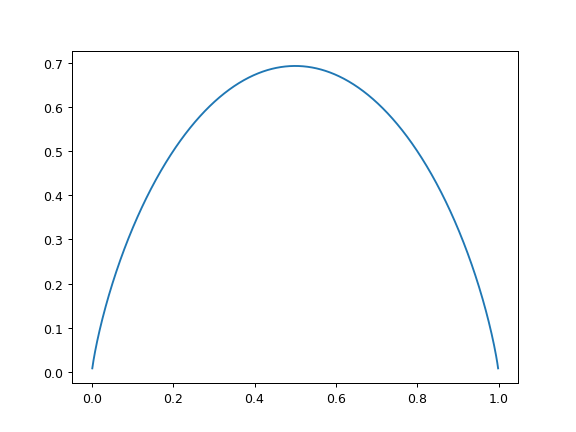

In [8]:
x=sym.Symbol('x',real=True)
f=lambda x: -(x*np.log(x) + (1-x)*np.log(1-x))
X=np.linspace(0.001,0.999,1000)
y=f(X)

plt.plot(X,y)



e)
Partiendo de la fórmula 

$$
\frac{1}{T}= \Big(\frac{\partial S}{\partial x}\Big)_{N}\Big(\frac{\partial x}{\partial E}\Big)_{N}
$$

Tenemos:

$$
\begin{equation}
\begin{split}
\frac{\partial S}{\partial x} &= -k_{B}N\Big(ln(x)+\frac{x}{x}-ln(1-x) - \frac{1-x}{1-x}\Big)\\
&=-k_{B}N\Big (ln(x)-ln(1-x)\Big)
\end{split}
\end{equation}
$$

y

$$
\begin{equation}
\begin{split}
\frac{\partial x}{\partial E} &=\frac{1}{N(\epsilon_{0}-\epsilon_{1})}(1-0)\\
&=\frac{1}{N(\epsilon_{0}-\epsilon_{1})}
\end{split}
\end{equation}
$$

De modo que se tiene:
$$
\begin{equation}
\begin{split}
\frac{1}{T}&= \Big(\frac{\partial S}{\partial x}\Big)_{N}\Big(\frac{\partial x}{\partial E}\Big)_{N}\\\frac{1}{T}&=\Big(-k_{B}N [ln(x)-ln(1-x)]\Big)\frac{1}{N(\epsilon_{0}-\epsilon_{1})}\\
\frac{1}{T}&=\Big(-k_{B}[ln(x)-ln(1-x)]\Big)\frac{1}{\epsilon_{0}-\epsilon_{1}}\\
T&=\frac{\epsilon_{0}-\epsilon_{1}}{-k_{B}[ln(x)-ln(1-x)]}\\
T&=\frac{\Delta E}{-k_{B}[ln(x)-ln(1-x)]}\\
ln(x)-ln(1-x)&=\frac{\Delta E}{-k_{B}T}\\
ln\Big(\frac{1-x}{x}\Big) &=\frac{\Delta E}{k_{B}T}\\
ln\Big(\frac{1}{x} -1\Big) &=\frac{\Delta E}{k_{B}T}\\
\frac{1}{x} -1&= e^{\frac{\Delta E}{k_{B
}T}}\\
\frac{1}{x}&=e^{\frac{\Delta E}{k_{B
}T}} +1\\
x&
=\frac{1}{e^{\frac{\Delta E}{k_{B}T}} +1}
\end{split}
\end{equation}
$$


f)
Para $T\rightarrow \infty$:
$$
\begin{equation}
\begin{split}
\lim_{T\to\infty} x(T) &=\lim_{T\to\infty} \frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}} \\
&=\frac{1}{1+e^{\frac{\Delta E}{\infty}}}\\
&=\frac{1}{1+e^{0}}\\
&=\frac{1}{1+1}\\
&=\frac{1}{2}
\end{split}
\end{equation}
$$

Para $T\rightarrow 0$:
$$
\begin{equation}
\begin{split}
\lim_{T\to 0} x(T) &=\lim_{T\to 0} \frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}} \\
&=\frac{1}{1+e^{\frac{\Delta E}{0}}}\\
&=\frac{1}{1+e^{\infty}}\\
&=\frac{1}{\infty}\\
&=0
\end{split}
\end{equation}
$$

Para altas temperaturas, es decir $T \leftarrow \infty$:

$$
\begin{equation}
\begin{split}
S(T)&= \lim_{T\to \infty} -k_{B}N \Big[\frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}} ln \Big(\frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}} \Big)+\Big(1- \frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}}\Big)ln \Big(1- \frac{1}{1+e^{\frac{\Delta E}{k_{B}T}}} \Big) \Big]\\
&= -k_{B}N \Big[\frac{1}{2}ln\Big(\frac{1}{2}\Big) + \frac{1}{2}ln\Big(\frac{1}{2}\Big)\Big]\\
&=-k_{B}N ln \Big(\frac{1}{2} \Big)\\
&= -k_{B}N\Big( ln(1) -ln(2) \Big)\\
&= k_{B}N ln(2)
\end{split}
\end{equation}
$$



g)

Según la formula del cambio de entropía para procesos isotérmicos dada por:

$$
\begin{equation}
\begin{split}
\Delta S&= \int_{V}^{2V} P dV\\
&= \int_{V}^{2V} \frac{NRT}{V}dV\\
&= NRT ln \Big(\frac{2V}{V} \Big)\\
&=NRTln(2)
\end{split}
\end{equation}
$$

Se puede identificar que este resultado y el del punto anterior tienen prácticamente la misma forma ya que si se toma $k_{B}=RT$ se obtendría el mismo resultado $k_{B}Nln(2)$ 

## Distribuciones Discretas de Probabilidad

3

Sabiendo que entre los 10 microchips en el embarque hay 3 defectuosos y que la empresa tendrá 2 de estos al azar, entonces tenemos las siguientes tres posibilidades:

1- Elegir 2 defectuosos:

En este caso se tendrá que la forma de escoger justo esos dos está dada por la siguiente combinatoria:

$$
\binom{3}{2}
$$

Siendo el $3$ losmicrochips totales defectuosos y el $2$ los microchips que se eligieron.

2- Elegir 1 defectuoso:

En este caso se tendrá que la forma de escoger uno defectuoso y uno en buen estado está dada por la siguiente combinatoria:

$$
\binom{3}{1}\binom{7}{2}
$$

Siendo el $3$ losmicrochips totales defectuosos y el $1$ los microchips que se eligieron de estos y se multiplica por la cantidad no defectuosa que fue adquirida por la empresa dada por $\binom{7}{2}$.

3- No elegir ningún microchip defectuoso:

En este caso se tendrá que la forma de escoger amboss en buen estado está dada por la siguiente combinatoria:

$$
\binom{7}{2}
$$

Siendo el $7$ losmicrochips totales en buenestado y el $2$ los microchips que se eligieron.

De modo que si tomamos $x$ como la cantidad de microchips tendremos que la distribución de probabilidad está dada por:

$$
f(x)=\frac{\binom{7}{2-x}\binom{3}{x}}{\binom{10}{2}}
$$

donde el factor $\binom{7}{2-x}$ se refiere a los microchips no defectuosos, el factor $\binom{3}{x}$ a los defectuosos y el factor $\binom{10}{2}$ a los microchips totales adquiridos por la empresa.

$$
\\
\\
$$

In [9]:
def Combinatoria(n,r):
    return np.math.factorial(n)/(np.math.factorial(r)*np.math.factorial(n-r))

De este modo para el caso de obtener $0$ microchips defectuosos tenemos que la distribución de probabilidad es de:

In [10]:
P0=Combinatoria(7,2-0)*Combinatoria(3,0)/Combinatoria(10,2)
P0

0.4666666666666667

Para $1$ Microchip defectuoso:

In [11]:
P1=Combinatoria(7,2-1)*Combinatoria(3,1)/Combinatoria(10,2)
P1

0.4666666666666667

Para $2$ microchips defectuosos:

In [12]:
P2=Combinatoria(7,2-2)*Combinatoria(3,2)/Combinatoria(10,2)
P2

0.06666666666666667

4

a)

En este ejercicio los casos posibles son independientes entre sí, por ende, la fórmula de combinatoria esta dada por la multiplicación entre la probabilidad de que ocurra cada uno de los casos entre la probabilidad total. 

Si $x$ es la cantidad de electrones que salen, $y$ es la cantidad de protones y la caja cuántica cuenta con 3 electrones, 2 protones y 3 neutrones. 
Existen 3 casos posibles: que salga almenos un electrón, que salga almenos un protón y que salga almenos un neutrón y están dadas por:

Que salga almenos un electrón:
$$
 \binom{3}{x}
$$

Que salga almenos un protón:
$$
 \binom{2}{y}
$$

Que salga almenos un neutrón:
Dado que no tenemos una variable fija para la cantidad de neutrones, podemos despejarla a partir de que se escogen 4 elementos y se sabe que entre esos están los electrones($x$), los protones($y$) y los neutrones.

$$
\begin{equation}
\begin{split}
x+y+neutrones&=4\\
\\
neutrones&=4-x-y
\end{split}
\end{equation}
$$
Ya sabiendo la fórmula para neutrones su probabilidad se expresaría de la siguiente manera:
$$
 \binom{3}{4-x-y} 
$$


Por último, hay un total de 8 elementos de los cuales se seleccionan 4, siendo la razón entre los casos totales y los posibles es la siguiente:
$$
 \binom{8}{4}
$$

Por ende, La distribución de densidad conjunta se expresa como:

$$
\frac{\binom{3}{x}  \binom{2}{y}  \binom{3}{4-x-y}  }{\binom{8}{4} }
$$

Llegando a la ecuación esperada.


b)

In [13]:
x= sym.Symbol("x", real = True)
y= sym.Symbol("y", real = True)
combinatoria= lambda x,y: np.math.factorial(x) / (np.math.factorial(np.abs(y))*np.math.factorial(np.abs(x-y)))
def funcion(x, y):
    return combinatoria(3,x)*combinatoria(2,y)*combinatoria(3,(4-x-y))/ combinatoria(8,4)

In [14]:
protones= 2
electrones=3
def gx(x,y):
    gx = 0
    for y in range(protones+1):
        gx += funcion(x, y)
  
    return gx
def hy(x,y):
    hy=0
    for x in range(electrones+1):
        f=funcion(x,y)
        hy+=f
    return hy

gx(0,y),hy(x,0)

(0.075, 0.21785714285714286)

c)

In [15]:
ex = 0
for x in range(electrones+1):
    ex += x * gx(x,0)
ex=ex
exnew=round(ex,1)
exnew

1.5

d)

In [16]:
ey = 0
for y in range(protones+1):
    ey += y * hy(0,y)
ey=ey
eynew=round(ey,1)
eynew

1.0

e)

In [17]:
exy=0
for x in range(electrones+1):
    for y in range(protones+1):
        exy+= x * y * funcion(x, y)
    
covarianza1 = exy - (ex*ey)
covarianza1

-0.2143622448979594

f)

In [18]:
exy2=0
for x in range(electrones+1):
    for y in range(protones+1):
        exy2+= (x-ex)*(y-ey)*funcion(x,y)
exy2

-0.20349435131195337

g)

Las variables $x$ y $y$ son linealmente independientes solo si la covarianza tiene un valor de 0. En este ejercicio la covarianza tiene un valor de alrededor de -3/14, de modo que las variables tienen una dependencia entre si.

## Distribuciones Contínuas de Probabilidad

1 

In [19]:
x= sym.Symbol("x", real = True)
y= sym.Symbol("y", real = True)
funcion=(2/3)*(x+2*y)
funcion


0.666666666666667*x + 1.33333333333333*y

a)

Para que sea una funcion de densidad la integral entre su limite inferior y limite superior debe dar 1, en este caso es necesario realizar una integral doble (con respecto a x y luego con respecto a y) ambas entre 0 y 1, teniendo en cuenta que fueron los limites del ejercicio, quedandonos de la siguiente manera:
$$ 
\begin{equation}
\begin{split}
densidad&= \int_0^1\ \int_0^1\ \frac{2}{3}(x+2y)dxdy\\
&= \int_0^1\ \Big(\frac{1}{3}+\frac{4}{3}y\Big)dy\\
&=1
\end{split}
\end{equation}
$$

Como el resultado dio 1 la función si es una función de densidad conjunta valida



In [20]:
integralx=sym.integrate(funcion,(x,0,1))
integralfinal= sym.integrate(integralx,(y,0,1))
integralfinal

1.00000000000000

b)

Sean x y y variables de nuestra función de probabilidad $f(x, y)$ las distribuciones marginales $g(x)$ y $h(y)$ están dadas por:
$$
g(x)= \int_0^1\ \frac{2}{3}(x+2y)dy\\
h(y)= \int_0^1\ \frac{2}{3}(x+2y)dx
$$
Donde los límites se definen por los límites de la función y la distribución respecto a $x$ es la integral respecto a $y$ y la distribución respecto a $y$ es la integral respecto a $x$ 

Donde al desarrollar la integral se llega a los siguientes valores:

$$
g(x)= \frac{2}{3}(x+1)\\
h(y)= \frac{1}{3}+\frac{4}{3}y
$$



In [21]:
gx=sym.integrate(funcion,(y,0,1))
hy=sym.integrate(funcion,(x,0,1))

gx,hy

(0.666666666666667*x + 0.666666666666667,
 1.33333333333333*y + 0.333333333333333)

c)

Para calcular $\mathbb{E}(x)$ se debe integrar con respecto a $x$ y a la multiplicación entre la distribución marginal $G(x)$, quedando la expresión de la siguiente manera:
$$
\begin{equation}
\begin{split}
\mathbb{E}(x)&= \int_0^1\ x G(x) dx\\
&= \int_0^1\ x \frac{2}{3}(x+1)dx\\
&= \frac{5}{9}
\end{split}
\end{equation}
$$


In [22]:
Ex=sym.integrate(x*gx,(x,0,1))
Ex

0.555555555555556

d)

Para calcular $\mathbb{E}(y)$ se debe integrar respecto a $y$ y a la multiplicación entre la distribución marginal $H(y)$, quedando la expresión de la siguiente manera:
$$
\begin{equation}
\begin{split}
\mathbb{E}(y)&= \int_0^1\ y H(y)dx\\
&= \int_0^1\ y (\frac{1}{3}+\frac{4}{3}y)dx\\
&= \frac{11}{18} 
\end{split}
\end{equation}
$$

In [23]:
Ey=sym.integrate(y*hy,(y,0,1))
Ey

0.611111111111111

e)

Para utilizar esa fórmula solo nos faltaría conocer a $\mathbb{E}(xy)$ y esta es una integral doble que se expresa de la siguiente manera:

$$
\begin{equation}
\begin{split}
\mathbb{E}(xy)&= \int_0^1 \int_0^1 xyf(x,y) dxdy\\
&=\int_0^1 \int_0^1 xy \frac{2}{3}(x+2y)dxdy\\
&=\int_0^1 \frac{2y}{3}\Big(\frac{1}{3}+y\Big)dy\\
&=\frac{1}{3}
\end{split}
\end{equation}
$$

Ya conociendo el valor de $\mathbb{E}(xy)$ se aplica la fórmula y da que la covarianza es:

$$
\begin{equation}
\begin{split}
\mathbb{E}(xy)-\mathbb{E}(x)\mathbb{E}(y)&= \frac{1}{3} - \Big(\frac{5}{9}\Big)  \Big(\frac{11}{18}\Big)\\
&=-0.00617
\end{split}
\end{equation}
$$
Obteniendo el resultado esperado.


In [24]:
E2= sym.integrate(x*funcion,(x,0,1))
Exy=sym.integrate(y*E2,(y,0,1))

covarianza1=Exy-Ex*Ey
covarianza1

-0.00617283950617281

f)

El otro metodo para encontrar la covarianza es utilizando la fórmula $\mathbb{E}((x − \mathbb{E}x)(y − \mathbb{E}y))$ para evaluar a $\mathbb{E}$ y realizar posteriormente una doble integral:

$$
\begin{equation}
\begin{split}
covarianza&= \int_0^1 \int_0^1 (x-\mathbb{E}x)(y-\mathbb{E}y)f(x,y)dxdy\\
&= \int_0^1 \int_0^1 \Big(x-\frac{5}{9}\Big )\Big(y-\frac{11}{18}\Big 
 )\Big(\frac{2}{3}\Big)(x+2y)dxdy\\
&= \int_0^1\Big(-\frac{11}{27}+\frac{2y}{3}\Big)\Big(-\frac{5}{18}-\frac{10y}{9}+\frac{1}{3}+y\Big)dy\\
&= -0.00617
\end{split}
\end{equation}
$$

Obteniendo el mismo resultado que en el inciso e).


In [25]:
integralx= sym.integrate((x-Ex)*funcion,(x,0,1)) 
covarianza2=sym.integrate(integralx*(y-Ey),(y,0,1))
covarianza2

-0.00617283950617284

g)
Teniendo en cuenta que en los puntos previos se llegó a que la covarianza es de $-0.00617$, las variables $x$ y $y$ no son linealmente intependientes, ya que para serlo se debió obtener una covarianza de $0$

4

In [26]:
x=sym.Symbol("x",real=True)
f= sym.exp(-x)
g=sym.exp(2*x/3)

In [27]:
integral=sym.integrate(g*f,(x,0,np.inf))
integral

3

## Metropolis Hasting

1

In [28]:
def Prior(p):
    #piecewise es una definición de función a trozos
    return np.piecewise(p,[p>=0 and p<=1,p<0 and p>1],[lambda p: 1, lambda p:0])
Prior=np.vectorize(Prior)

def Likelihood(p,r,n):
    #r-> númeo de éxitos
    #n-> númeo de lanzamientos
    #p-> probabilidad
    return p**r*(1-p)**(n-r)

def Posterior (p,r,n):
    return Likelihood(p,r,n)*Prior(p)

def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

100%|██████████| 9999/9999 [00:02<00:00, 3930.22it/s]


<IPython.core.display.Javascript object>


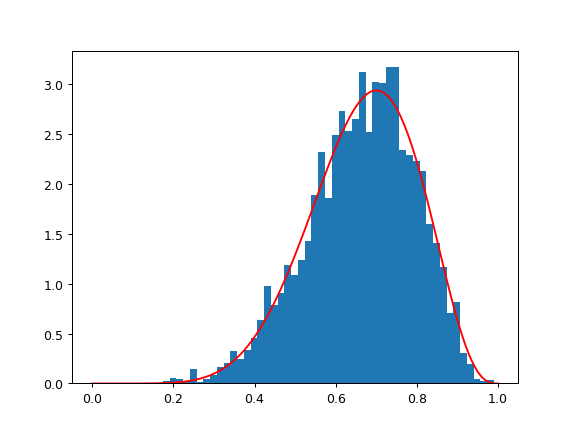

In [29]:
p=np.linspace(0,1,100)
r=7
n=10
Pos=Posterior(p,r,n)
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
initparams=np.array([0.2])
MCMC=Metropolis(initparams,Posterior)
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos/I, color='r')
     

In [30]:
liminf=np.percentile(MCMC,16)
liminf

0.5314197093080884

In [31]:
limsum=np.percentile(MCMC,84)
limsum

0.7964399667390526

In [32]:
mediana=np.percentile(MCMC,50)
mediana

0.6740378679032406

In [33]:
upperlimit=np.percentile(MCMC,95)
upperlimit

0.8595769453660125

In [34]:
var= np.var(MCMC)
var

0.01742319940204892

De modo que se puede decir que la moneda está truncada ya que se evidencia una desviación en la gráfica respecto a la que se esperaría si fuera equiprobable obtener cara o sello.

3

In [35]:
N=1000
x_i=0
mu=2
sigma=0.5
datos = [x_i]
xi=x_i
for i in range(1,N+1):
    central=np.random.normal(xi,sigma)
    aceptacion= min(1, np.exp(-(central - mu)**2 / (2*sigma**2)) / np.exp(-(xi - mu)**2 / (2*sigma**2)))
    numero = np.random.rand()
    if numero < aceptacion:
        xi=central
    datos.append(xi)

<IPython.core.display.Javascript object>


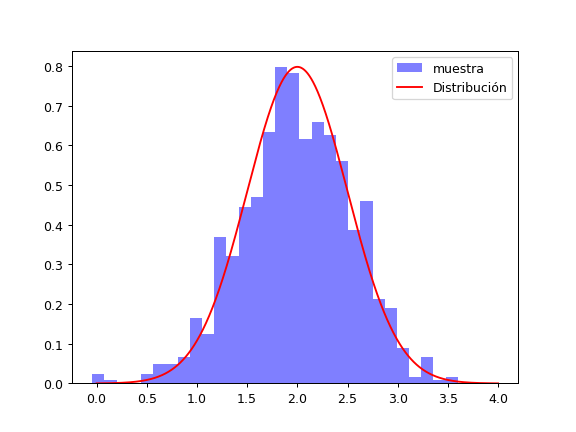

In [36]:
fig, ax = plt.subplots()
plt.hist(datos, bins=30, density=True, alpha=0.5, label='muestra',color='b')
idealx= np.linspace(0, 4, 1000)
idealy = norm.pdf(idealx, mu, sigma)
ax.plot(idealx, idealy, label='Distribución',color='r')
ax.legend()
plt.show()

4

In [37]:
N=1000
x_i=0
datos = []
xi=x_i
paso=0.4
for i in range(1, N+1):
    central=xi+np.random.normal(x_i,paso)
    aceptacion= min(1,(1/(np.pi*(1+central**2))) /(1/(np.pi*(1+xi**2))))
    numero = np.random.rand()
    if numero < aceptacion:
        xi=central
    datos.append(xi)

<IPython.core.display.Javascript object>


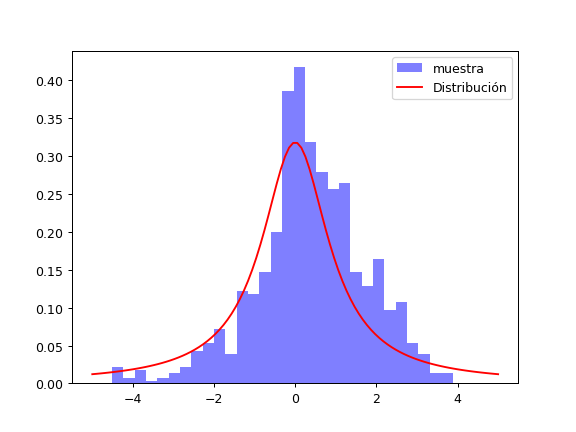

In [39]:
fig, ax = plt.subplots()
plt.hist(datos, bins=30, density=True, alpha=0.5, label='muestra',color='b')
idealx= np.linspace(-5, 5, 100)
idealy = cauchy.pdf(idealx, 0, 1)
ax.plot(idealx, idealy, label='Distribución',color='r')
ax.legend()
plt.show()

## Parameter Estimation

3

a)

In [40]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    x=[]
    
    while len(linea)>0:
        datos=linea.split(" ")
        datos[0]
        x.append(float(datos[0]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x)

In [41]:
X=np.array(cargar('GaussianData.txt'))
X

array([ 0.90645143,  5.44611668,  6.84023829,  0.7436439 ,  7.33851806,
        3.90194497,  3.99141194,  6.63773945,  3.29863313,  2.5263119 ,
        6.02328429,  2.48439406,  5.05871256,  3.76490762,  4.14742489,
       -0.3806526 ,  3.82357634,  1.51182547,  2.43154466,  3.99805201,
        3.54379274,  3.96036376,  4.65182186,  4.53193625,  3.4696115 ,
        4.65221447,  7.61107996,  6.24041004,  1.05374544,  3.62154606,
        3.53077271,  4.19197859,  3.55221699,  3.90865005,  5.76443674,
        2.63533463,  4.43729836,  6.67515723,  6.66005072,  3.46112223,
        0.50538447,  2.8245733 ,  3.82463394,  4.93926748,  3.34332658,
        4.73462971,  5.74401288,  5.29159347,  6.17391981,  0.98252883,
        1.73405911,  3.58803383,  5.10611351,  2.74742979,  4.72965462,
        3.9192504 ,  5.5411113 ,  2.59250776,  4.7904863 ,  3.7471351 ,
        4.93786432,  5.6652078 ,  5.49974363,  4.87089337,  4.84319838,
        3.11325577,  4.70316273,  5.48448502,  2.27142366,  3.89

b)

In [42]:
def Priori(mu,sigma):
    
    pi=0
    
    if mu>=3 and mu<=5:
        if sigma>=0.5 and sigma<=3.5:
            pi=1
    else:
        pi=0
            
    return pi

c)

In [43]:
def Likelihood(mu,sigma,x):
    
    resp=1
    for i in range(len(x)):
        resp*=np.exp((-((mu-x[i])**2))/(2*sigma**2)) / (2*np.pi*sigma**2)**(1/2)
    return resp     

d)

In [44]:
Posterior=lambda mu,sigma,x: np.log(Likelihood(mu,sigma,x)*Priori(mu,sigma))

e)

In [45]:
N=int(2e4)
def Metropolis(x):
    mu = np.random.uniform(3, 5)
    sigma=np.random.uniform(0.5,3.5)
    post_1= Posterior( mu, sigma,X)
    mu_resp=[mu]
    sigma_resp=[sigma]
    
    for i in range(N):
        mu_i=np.random.normal(mu,0.1)
        sigma_i=np.random.normal(sigma,0.1)
        
        post_i = Posterior(mu_i,sigma_i,x)
        
        if post_i > post_1:
            post_1=post_i
            mu=mu_i
            sigma=sigma_i
            
        else:
            poster=np.exp(post_i-post_1)
            
            if poster>np.random.uniform():
                post_1=post_i
                mu=mu_i
                sigma=sigma_i
                
        mu_resp.append(mu)
        sigma_resp.append(sigma)
    
    return mu_resp, sigma_resp

f)

In [46]:
mu,sigma=Metropolis(X)

mu_mediana=np.percentile(mu,50)
sigma_mediana=np.percentile(sigma,50)

mu_mediana,sigma_mediana

(4.020892202775151, 1.8296050972209172)

g)

In [47]:
mu_liminf=np.percentile(mu,16)
mu_limsum=np.percentile(mu,84)
sigma_liminf=np.percentile(sigma,16)
sigma_limsum=np.percentile(sigma,84)


In [48]:
mu_lowererr=mu_mediana- mu_liminf
mu_lowererr


0.18215060016031082

In [49]:
mu_uppererr=-mu_mediana+ mu_limsum
mu_uppererr


0.18438360926328912

In [50]:
sigma_uppererr=sigma_limsum- sigma_mediana
sigma_uppererr

0.14118107313837358

In [51]:
sigma_lowererr=sigma_mediana-sigma_liminf
sigma_lowererr

0.12539321271023773

5

a) Lo intentamos.


Pd: no se pudo :)

b)

In [52]:
def DistribucionExponencial(n, theta):
    
    dist=np.mean(np.random.exponential(scale=theta, size=n))
    return dist

def montecarlo(n, theta, N):
    resp = np.zeros(N)
    
    for i in range(N):
        
        dist = DistribucionExponencial(n, theta)
        resp[i]=dist
    
    varianza = np.var(resp)
    return varianza


In [53]:
n = 20  
theta = 2  
N = 10**6  
var= montecarlo(n, theta, N)
var

0.19990532281894266